In [131]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential
from PIL import Image
import matplotlib.pyplot as plt

In [132]:
model = Sequential([
                    Conv2D(16,(3,3),activation='relu',input_shape=(800,800,3)),
                    MaxPooling2D(2,2),
                    Conv2D(32,(3,3),activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(10,activation='relu'),
                    Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 798, 798, 16)      448       
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 399, 399, 16)      0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 397, 397, 32)      4640      
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 196, 196, 64)      18496     
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 96, 96, 64)      

In [133]:
model.compile(optimizer='RMSProp',loss='binary_crossentropy',metrics=['accuracy'])

In [134]:
data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255,validation_split=0.2)
train_data = data.flow_from_directory('drive/MyDrive/arrow-basic-dataset',class_mode='binary',target_size=(800,800),color_mode='rgb',subset='training')
val_data = data.flow_from_directory('drive/MyDrive/arrow-basic-dataset',class_mode='binary',target_size=(800,800),color_mode='rgb',subset='validation')
#train_data,val_data = keras.preprocessing.image_dataset_from_directory(directory='drive/MyDrive/arrow-basic-dataset',labels='inferred',image_size=(800,800),shuffle=True)


Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [135]:
history = model.fit(train_data,epochs=8,shuffle=True,steps_per_epoch=8)

Epoch 1/8
8/8 [==============================] - 6s 578ms/step - loss: 0.6953 - accuracy: 0.5166
Epoch 2/8
8/8 [==============================] - 5s 600ms/step - loss: 0.6811 - accuracy: 0.6978
Epoch 3/8
8/8 [==============================] - 5s 580ms/step - loss: 0.4418 - accuracy: 0.8513
Epoch 4/8
8/8 [==============================] - 5s 624ms/step - loss: 0.1793 - accuracy: 0.9121
Epoch 5/8
8/8 [==============================] - 5s 589ms/step - loss: 0.1115 - accuracy: 0.9770
Epoch 6/8
8/8 [==============================] - 5s 585ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 7/8
8/8 [==============================] - 5s 616ms/step - loss: 5.6844e-04 - accuracy: 1.0000
Epoch 8/8
8/8 [==============================] - 5s 587ms/step - loss: 2.2606e-04 - accuracy: 1.0000


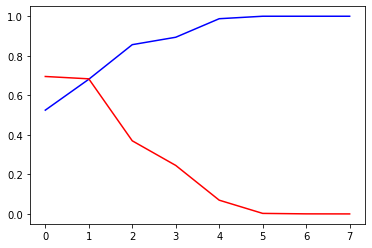

In [136]:
plt.plot(history.history['accuracy'],color='b')
plt.plot(history.history['loss'],color='r')
plt.show()

In [139]:
history = model.evaluate(val_data,steps=5)
print(history)

5/5 [==============================] - 1s 274ms/step - loss: 0.0755 - accuracy: 1.0000
[0.0755053460597992, 1.0]


In [141]:
"""image = Image.open('right-arrow.jpg')
image = image.resize((800,800))
#image = keras.preprocessing.image.load_img('right-arrow.jpg')
#image.resize((800,800))
image = keras.preprocessing.image.img_to_array(image)
background = Image.new("RGB", (image.size), (255, 255, 255))
print(image.shape)"""

KeyboardInterrupt: ignored